# High dynamic range dataset synthesis

This workbook demonstrates how to merge image stacks taken at different exposure times into a single high dynamic range (HDR) dataset.

## Load the individual datasets

In [1]:
from pathlib import Path

import numpy as np
from skimage import io

from leb.freeze import FPDataset, StackType, hdr_stack, load_dataset

In [2]:
imgs_short = Path("led-array-datasets/hdr/human-blood-smear/human_blood_short_exp.tif")
imgs_medium = Path("led-array-datasets/hdr/human-blood-smear/human_blood_medium_exp.tif")
imgs_long = Path("led-array-datasets/hdr/human-blood-smear/human_blood_long_exp.tif")

dark_short = io.imread(Path("led-array-datasets/hdr/human-blood-smear/dark_frame_short_exp.tif"))
dark_medium = io.imread(Path("led-array-datasets/hdr/human-blood-smear/dark_frame_medium_exp.tif"))
dark_long = io.imread(Path("led-array-datasets/hdr/human-blood-smear/dark_frame_long_exp.tif"))

# StackType.FREEZE corresponds to the metadata format used by this library.
data_short = load_dataset(imgs_short, stack_type=StackType.FREEZE, wavelength_um=0.473)
data_medium = load_dataset(imgs_medium, stack_type=StackType.FREEZE, wavelength_um=0.473)
data_long = load_dataset(imgs_long, stack_type=StackType.FREEZE, wavelength_um=0.473)

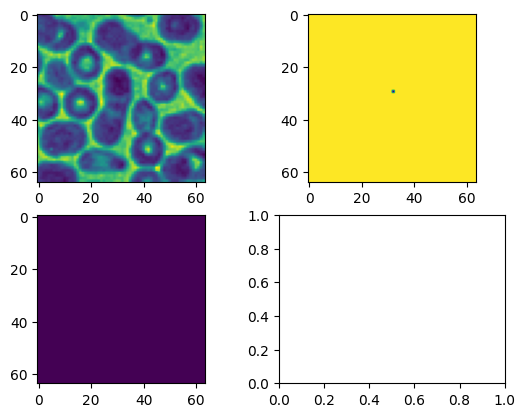

In [3]:
# Show the first image from each dataset
io.imshow_collection([data_short.images[0], data_medium.images[0], data_long.images[0]])
io.show()

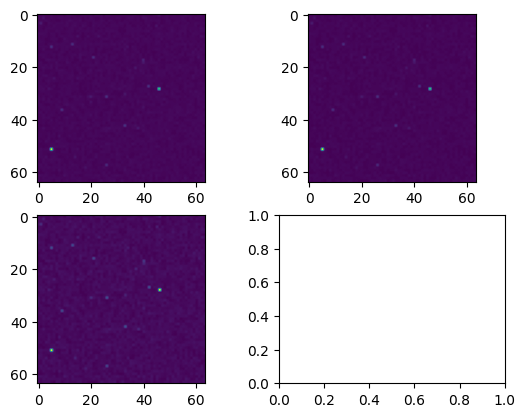

In [4]:
# Show the dark frames
io.imshow_collection([dark_short, dark_medium, dark_long])
io.show()

## Combine the image stacks into one HDR image

In [5]:
# Convert to a 3D float64 array, as required by the HDR algorithm
dark_frames = np.array([x.astype(np.float64) for x in (dark_short, dark_medium, dark_long)])

hdr = hdr_stack(
    datasets=[data_short, data_medium, data_long],
    dark_fr=dark_frames,
    expo_times = np.array([1500/1500, 3000/1500, 5000/1500]),  #  Relative to first exposure time
    gain = np.array([10, 20, 30]),  # dB,
)

  0%|          | 0/256 [00:00<?, ?it/s]

100%|██████████| 256/256 [00:00<00:00, 1070.77it/s]


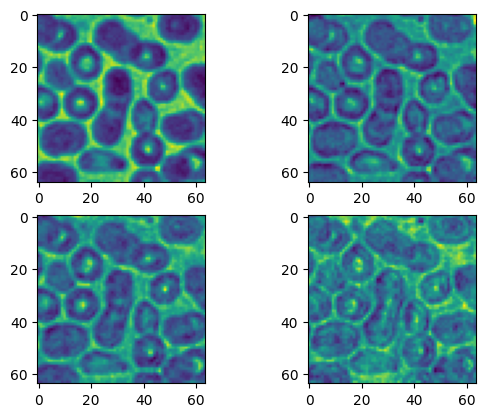

In [6]:
io.imshow_collection(hdr.images[0:4])
io.show()

### File I/O

In [7]:
# Save the HDR FPDataset to a file
file_path = Path("hdr.dat")
hdr.save(file_path)

In [8]:
# Load the HDR image dataset
hdr_loaded = FPDataset.load(file_path)

In [9]:
# Clean up
file_path.unlink()